# Movie Recomendation System

In [1]:
# Import the necessary libraries for data manipulation and graphical visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the files
movies=pd.read_csv("tmdb_5000_movies.csv")
credits=pd.read_csv("tmdb_5000_credits.csv")

In [3]:
#from google.colab import drive

# Monta Google Drive
#drive.mount('/content/drive')

In [4]:
#Read the files
#movies=pd.read_csv("/content/drive/MyDrive/Massive/tmdb_5000_movies.csv")
#credits=pd.read_csv("/content/drive/MyDrive/Massive/tmdb_5000_credits.csv")

In [5]:
# Display the first few rows of the 'movies' DataFrame
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Display the first few rows of the 'credits' DataFrame
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


We realise that both files contain the same films, so we bring them together in one unique file.

In [7]:
copy=credits.rename(columns={'movie_id':'id'})
file = pd.merge(copy, movies, on='id')
file.head()
#file is the merge of the two initial dataframes

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Exploratory Analysis

First of all, to familiarise ourselves with the data, we will make a small exploratory analysis.

### Language of the films

In [8]:
#original language
languages=file["original_language"]
distinct_languages=languages.value_counts()
distinct_languages.head()

en    4505
fr      70
es      32
zh      27
de      27
Name: original_language, dtype: int64

We realise that there are far more films in english that in any other language, so we decide to separate these films and to make a pie chart to visualize the distribution of English vs non-English films

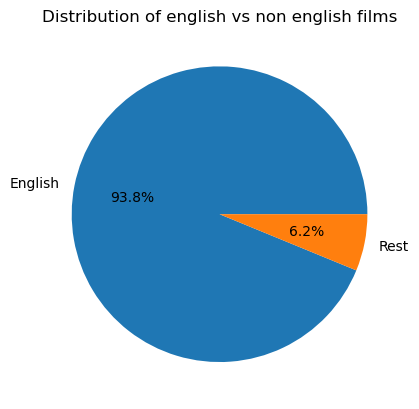

In [9]:
#We separate english from the rest
counts=[distinct_languages.values[0],np.sum(distinct_languages.values[1:])]
labels=["English","Rest"]

# Creating a pie chart 
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.title("Distribution of english vs non english films");


As expected, english is the original language for most of the films. To see the difference between the rest of the languages, we do a barchart.

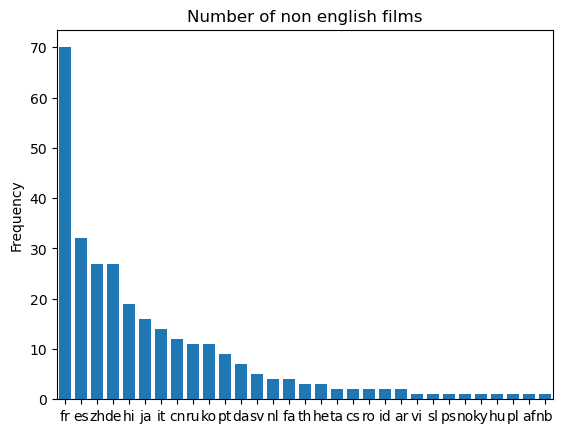

In [10]:
plt.bar(distinct_languages.index[1:],distinct_languages.values[1:])
plt.xlim(-0.5, 30.5)
plt.ylabel("Frequency")
plt.title("Number of non english films");

French and spanish are the majority languages, although obviously to a lesser extent than English.

### Status of the films

We study the variable status

In [11]:
file["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

We feel that films that have not yet been released do not work for us. We can't recommend a film that hasn't been released yet, it doesn't make sense. No matter how similar it may seem to a film you like, we don't think we should recommend it if it is not yet possible to watch it. For this reason, and because there are few films with this circumstance, we decide to remove them.

In [12]:
file=file.loc[file["status"]=="Released"]

### Rating and budget

We want to see whether there is a visual relation between the columns "rating" and "budget". 

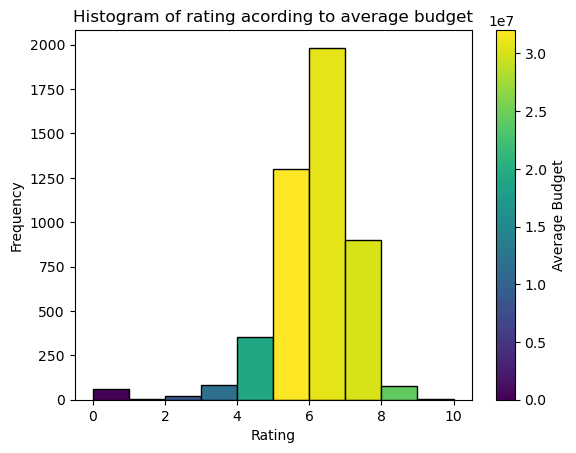

In [13]:
num_bins = 10

n, bins, patches = plt.hist(file['vote_average'], edgecolor='black')

# Calculate the average of each bin
bin_means = [file['budget'][(file['vote_average'] >= bins[i]) & (file['vote_average'] < bins[i + 1])].mean() for i in range(num_bins)]

# Assign colours to the bars according to the average budget in that bin
for i in range(num_bins):
    color = plt.cm.viridis(bin_means[i] / max(bin_means))
    patches[i].set_facecolor(color)
    
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(bin_means), vmax=max(bin_means)))
sm.set_array([])
cbar = plt.colorbar(sm, label='Average Budget')

plt.title('Histogram of rating acording to average budget')
plt.xlabel('Rating')
plt.ylabel('Frequency');


We see that depending on the budget, the rating of the films is generally different. This is logical, since the bigger the budget, the better the film is supposed to be. We appreciate that films with a rating above 5 are the ones with the higher average budget, on contrast with the ones below 5 that correspond with lower values of average budget.

## Content recomendation system

We remove the instances that dont have overview from our dataset to only take into account movies whose description we know.

In [14]:
#eliminate nan overview
file = file.dropna(subset=['overview'])

We use literal_eval to convert the strings in lists. This will be useful later.

In [15]:
from ast import literal_eval

things = ['cast', 'crew', 'keywords', 'genres']
for t in things:
    file[t] = file[t].apply(literal_eval)

This next function selects the amount of things you want from an ordered list. By default it takes 5 elements. If you try to get more elements than a list has, it simply takes them all.

In [16]:
def get_elements(list_things,quantity=5):
    names = [i['name'] for i in list_things]
    if len(names) > quantity:
        names = names[:quantity]
    return names


We use the previous function to modify cast, keywords and genres columns in our dataset. Now on those columns only appear the amount of things you selected before.

In [17]:
things = ['cast', 'keywords', 'genres']
for t in things:
    file[t] = file[t].apply(get_elements)

About the crew of each movie, we think it is only useful to know the director, so we select it from the crew column.

In [18]:
def get_director(crew):
    for c in crew:
        if c["job"]=="Director":
            return c["name"]
    return np.nan
#If it doesnt have director, we return Nan to not delete more movies.

Here we create the director columns

In [19]:
file["director"]=file["crew"].apply(get_director)

In [20]:
#We reset the index of the file.
file=file.reset_index(drop=True)

What we are going to do next is: First of all, given a movie of your choice, the 10 most similar movies will be returned according to their overview. Subsequently, the 10 movies will be reordered according to their director, keywords and genres.

In [21]:
##overview
from sklearn.feature_extraction.text import TfidfVectorizer
##usamos la funcion vista en las practicas....
vectorizer = TfidfVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(file['overview'])
matrix.shape

(4792, 20970)

In [22]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
#We use lineal kernel because it is computationally efficient
l_kernel = linear_kernel(matrix, matrix)

In [23]:
import heapq

# Define a function to extract the similarity score from a tuple
def get_similarity_score(x):
    return x[1]

def get_recommendations(title,metric,file_used=file):

    # Get the index of the movie that matches the title
    idx = file_used.loc[file_used['title_x'] == title].index[0]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(metric[idx]))

    # Get the indices of the top 10 most similar movies
    top_indices = heapq.nlargest(10, sim_scores, key=get_similarity_score)

    # Get the movie indices
    movie_indices = [i[0] for i in top_indices]

    # Return the top 10 most similar movies
    return file_used['title_x'].iloc[movie_indices]

In [24]:
# Print movie recommendations

print(get_recommendations('Avatar',l_kernel))
print('\n\n-------------------------------------------------\n\n')
print(get_recommendations('The Dark Knight Rises',l_kernel))

0
0                             Avatar
3602                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
Name: title_x, dtype: object


-------------------------------------------------


3
3                         The Dark Knight Rises
65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3852    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
Name: title_x, dtype: object


In [25]:
# Define a function 'create_soup' to concatenate keywords, cast, director, and genres into a soup string
def create_soup(x):
    keywords = ' '.join(x['keywords']) if isinstance(x['keywords'], list) else ''
    cast = ' '.join(x['cast']) if isinstance(x['cast'], list) else ''
    # Convert director to a string if it's not NaN, otherwise use an empty string
    director = str(x['director']) if pd.notna(x['director']) else ''
    genres = ' '.join(x['genres']) if isinstance(x['genres'], list) else ''

    return keywords + ' ' + cast + ' ' + director + ' ' + genres
# Apply the 'create_soup' function to each row of the DataFrame and create a new 'soup' column
file['soup'] = file.apply(create_soup, axis=1)

In [26]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
# Create the count matrix by fitting and transforming the 'soup' column
count_matrix = count.fit_transform(file['soup'])

In [27]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [28]:
# Get movie recommendations using the cosine similarity matrix
get_recommendations('The Dark Knight Rises',cosine_sim2)

3


3          The Dark Knight Rises
119                Batman Begins
65               The Dark Knight
4629    Amidst the Devil's Wings
2792        The Killer Inside Me
1196                The Prestige
428               Batman Returns
1359                      Batman
210               Batman & Robin
1720                    Kick-Ass
Name: title_x, dtype: object

In [29]:
get_recommendations('Beetlejuice',cosine_sim2)

2530


2530               Beetlejuice
2108       Edward Scissorhands
428             Batman Returns
1359                    Batman
1293             Frankenweenie
268              Stuart Little
2868    For Your Consideration
3366        Outside Providence
3457              Best in Show
42                 Toy Story 3
Name: title_x, dtype: object

# TRYOUT

We are going to try our recommendation system.

In [30]:
film=input("Type the title of a film you like: ")

Type the title of a film you like: Best in Show


In [31]:
recomendations=get_recommendations(film,l_kernel)
print("The most similar films according to the overview are: \n",recomendations)

3457
The most similar films according to the overview are: 
 3457             Best in Show
4129                   Circle
2891        Darling Companion
3125           Beat the World
725            The Shaggy Dog
2718          Far from Heaven
1348                    Aloha
2286    House on Haunted Hill
2410                Good Boy!
522            Hotel for Dogs
Name: title_x, dtype: object


From the file dataframe, we extract the 10 instances we want, to then reorder them.

In [32]:
mask=np.zeros(file.shape[0],dtype="bool")
for i in recomendations.index:
    ind=file.loc[file.index == i].index[0]
    mask[ind]=True
new_file=file[mask]
new_file=new_file.reset_index(drop=True)

In [33]:
new_file

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,director,soup
0,15189,Hotel for Dogs,"[Emma Roberts, Jake T. Austin, Don Cheadle, Jo...","[{'credit_id': '52fe46429251416c75072873', 'de...",35000000,"[Comedy, Family]",NaN,"[adoption, puppy, pitbull, orphan, foster home]",en,Hotel for Dogs,...,73034460,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,No stray gets turned away.,Hotel for Dogs,5.7,202,Thor Freudenthal,adoption puppy pitbull orphan foster home Emma...
1,10067,The Shaggy Dog,"[Tim Allen, Kristin Davis, Danny Glover, Spenc...","[{'credit_id': '52fe431a9251416c7500380d', 'de...",50000000,"[Comedy, Family]",http://movies.disney.com/the-shaggy-dog-2006,"[father son relationship, parents kids relatio...",en,The Shaggy Dog,...,61112916,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's going to be a ruff day.,The Shaggy Dog,4.5,137,Brian Robbins,father son relationship parents kids relations...
2,222936,Aloha,"[Bradley Cooper, Emma Stone, Rachel McAdams, B...","[{'credit_id': '55c56d18c3a3682f1c000b2a', 'de...",37000000,"[Drama, Comedy, Romance]",NaN,"[love triangle, hawaii, satellite, military, d...",en,Aloha,...,26250020,105.0,"[{""iso_639_1"": ""ru"", ""name"": ""P\u0443\u0441\u0...",Released,Sometimes you have to say goodbye before you c...,Aloha,5.2,692,Cameron Crowe,love triangle hawaii satellite military during...
3,11377,House on Haunted Hill,"[Geoffrey Rush, Famke Janssen, Taye Diggs, Pet...","[{'credit_id': '52fe44349251416c7502c6c3', 'de...",19000000,"[Horror, Mystery, Thriller]",NaN,"[lunatic asylum, aftercreditsstinger]",en,House on Haunted Hill,...,40846082,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Evil loves to party.,House on Haunted Hill,5.5,209,William Malone,lunatic asylum aftercreditsstinger Geoffrey Ru...
4,21765,Good Boy!,"[Molly Shannon, Liam Aiken, Matthew Broderick,...","[{'credit_id': '55ac1f8992514125da0078dd', 'de...",17000000,"[Comedy, Family, Science Fiction]",http://www.goodboy.com/,[],en,Good Boy!,...,0,87.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}]",Released,Rover is about to take over.,Good Boy!,4.7,30,John Robert Hoffman,Molly Shannon Liam Aiken Matthew Broderick Do...
5,10712,Far from Heaven,"[Julianne Moore, Dennis Quaid, Dennis Haysbert...","[{'credit_id': '52fe43a79251416c75018d35', 'de...",13500000,"[Drama, Romance]",NaN,"[black people, wife husband relationship, bota...",en,Far from Heaven,...,29027914,107.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's time to stop hiding from the truth.,Far from Heaven,6.9,144,Todd Haynes,black people wife husband relationship botanis...
6,89325,Darling Companion,"[Diane Keaton, Kevin Kline, Sam Shepard, Diann...","[{'credit_id': '52fe4a159251416c910c2953', 'de...",0,"[Drama, Romance]",NaN,[aftercreditsstinger],en,Darling Companion,...,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Darling Companion,5.3,22,Lawrence Kasdan,aftercreditsstinger Diane Keaton Kevin Kline S...
7,66767,Beat the World,"[Tyrone Brown, Mishael Morgan, Nikki Grant, Ch...","[{'credit_id': '56124ed4c3a3682206002b56', 'de...",10000000,"[Music, Drama]",NaN,[sporting event],en,Beat the World,...,0,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Feel the beat, live the dream.",Beat the World,4.3,16,Robert Adetuyi,sporting event Tyrone Brown Mishael Morgan Nik...
8,13785,Best in Show,"[Jay Brazeau, Parker Posey, Michael Hitchcock,...","[{'credit_id': '564a36039251414dcb0003c7', 'de...",0,[Comedy],NaN,"[illinois, pet shop, poodle, independent film,...",en,Best in Show,...,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some pets deserve a little more respect than o...,Best in Show,6.7,166,Christopher Guest,illinois pet shop poodle independent film mock...
9,335866,Circle,"[Julie Benz, Carter Jenkins, Cesar Garcia, M



Now we reorder the films according to the column "soap" created before

In [34]:
count = CountVectorizer(stop_words='english')
# Create the count matrix by fitting and transforming the 'soup' column
count_matrix = count.fit_transform(new_file['soup'])

In [35]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [36]:
# Get movie recommendations using the cosine similarity matrix
get_recommendations(film,cosine_sim,new_file)

8


8             Best in Show
4                Good Boy!
0           Hotel for Dogs
2                    Aloha
1           The Shaggy Dog
3    House on Haunted Hill
5          Far from Heaven
6        Darling Companion
7           Beat the World
9                   Circle
Name: title_x, dtype: object